# **Bank Marketing Campaign Analysis**


## 1. **Introduction**

This document provides an analysis of a bank's marketing campaign dataset, focusing on client engagement and subscription success. The main objective is to uncover insights into how different factors—such as job categories, contact duration, and client demographics—affect the likelihood of a successful subscription. The analysis is conducted using Python, employing libraries such as Pandas for data manipulation, Matplotlib and Seaborn for data visualization, streamlit for interractive dashboard.

## 2. **Project Methodology**

This analyis was approached using partial Cross-Industry Standard Process for Data Mining (CRISP-DM). CRISP-DM is one of the most popular and widely used professional frameworks in data science and analytics projects.

The methodology outlines a structured approach to analyze the bank's marketing campaign data in a systematic way. This process ensures that the analysis is systematic, replicable, and results in actionable insights.




# Installations

##### Install Packages

In [41]:
!pip install PyPDF2  # Install PyPDF2 version 2.12.1
!pip install streamlit


##### Import Libraries

In [42]:
# Import PDF reader
import PyPDF2

# Import Analytic and Visualization Lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Google Drive
from google.colab import drive


In [43]:
# Mount Drive
drive.mount('/content/drive')

# specify file path
file_path = '/content/drive/My Drive/Campaign Analysis/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. **Understanding the business**
Understand the project goals and requirements from a business perspective is crucial for a meaningful analysis outcome.Let's begin by reviewing the project documentation, campaign goal and problem statement.


### 3.1. Campaign Goal:
The goal of the campaign is to increase the subscription rates for a bank marketing campaign and identify client demographics with higher subscription rates.

### 3.2. Problem Statement:

The bank aims to increase the effectiveness of its marketing campaigns, improve client targeting, and ultimately enhance the overall conversion rate for term deposits, leading to increased revenue and customer satisfaction.

How can the bank enhance the success rate of its term deposit marketing campaigns by understanding which client characteristics and engagement strategies lead to higher subscription rates, and by identifying optimal timing for outreach efforts?

In [44]:
# Reading intructions from the client
pdf_file = 'instruction.pdf'

file = file_path + pdf_file

# Open the PDF file and read its content
with open(file, 'rb') as pdf:
    pdf_reader = PyPDF2.PdfReader(pdf)

    # Extract text from all pages
    instruction = ""
    for page in pdf_reader.pages:
        instruction += page.extract_text()

# Print the extracted text
print(instruction)


Project Brief: Bank Marketing Campaign 
Analysis for Data Analytics Elites  (DAE)  
Greetings from the Data Analytics Elites (DAE). In your role as a newly appointed Data 
Analyst, you will play a crucial role in our endeavors to unravel insights embedded in our 
marketing campaign data. DAE is committed to enhancing customer engagement and 
optimizing marketing strategies through  the strategic application of data -driven analyses. 
Your responsibility is to meticulously analyze our data, uncover trends, comprehend client 
behaviors, and provide valuable insights to inform strategic decision -making processes.  
Objective:  
To analyze and visualize the performance of marketing campaigns and predict client 
subscription to term deposits using Python, providing actionable insights for business 
improvement.  
Task: Marketing Campaign Analysis and Visualization 
using Python  
Data Preparation:  
• Import the dataset into a Python environment using libraries such as pandas.  
• Clean th

# 4. **Understanding project data**

The dataset contains bank's historical campaign data in CSV format. The dataset is delimited by semi-colon instand of comma. The bank used telephone marketing to promote term deposits, but there is a need to better understand which client characteristics and engagement strategies lead to higher subscription rates.


# 5. **Analysis Plan and Data Visualization**


###5.1. Load, read and clean the dataset.
###5.2. Preview the dataset and build data model if necessary
###5.3. Campaign Performance Overview:
  - Create a summary table that shows the total number of contacts, average campaign.

###5.4. Monthly Trends and subscription rate:  
  - Display monthly campaign trends in client using line graph  
  - Break down the subscription rates by month using a stacked area plot.  

###5.5. Client Demographics Analysis:  
  - Generate a bar plot to compare the subscription rates across different job categories.  
  - Determine the top-performing and bottom-performing job categories.  

###5.6. Contact Duration Analysis:  
  - Create a scatter plot to analyze the relationship between contact duration and subscription success.
  - Use data labels and color coding to highlight different job categories.  

###5.7. Client Segment Analysis:  
  - Calculate the subscription rates for different age groups and education levels.  
  - Use a pie chart to visualize the contribution of each segment to the overall subscription rate.  

###5.8. Interactive Dashboard (Bonus):  
  - Create an interactive dashboard using libraries such as Dash or Streamlit, where users can select a specific job category and see detailed information about its campaign performance.  
  - Use dropdowns, sliders, and interactive plots to make the dashboard user -friendly.  

### Load, read and clean the dataset

In [45]:

# Read CSV file from drive

csv_file = 'data.csv'
file = file_path + csv_file
df = pd.read_csv(file, delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [46]:
# check the end rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


### Data Preprocessing

In [47]:
# Renaming column with meaningful names
df = df.rename(columns={'y': 'subscription'})

# Month order
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convert the Month Column to a Categorical Type
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Sort the data
df = df.sort_values('month')


# Check for missing values and duplicates
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

print("Number of duplicates = ", duplicates, '\n')
print("Null Count (Missing Values): \n", missing_values, '\n')

# Ensure all columns have correct data type
print('Column types \n', df.dtypes)



Number of duplicates =  0 

Null Count (Missing Values): 
 age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscription    0
dtype: int64 

Column types 
 age                int64
job               object
marital           object
education         object
default           object
balance            int64
housing           object
loan              object
contact           object
day                int64
month           category
duration           int64
campaign           int64
pdays              int64
previous           int64
poutcome          object
subscription      object
dtype: object


In [48]:
# Save cleaned dataset to drive
df.to_csv('/content/drive/My Drive/Campaign Analysis/cleaned_data.csv', index=False)


### Preview the dataset and build data model

In [49]:
# Overall data summary
print('\n Overall data summary')
df.describe()


 Overall data summary


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [50]:
# verify column types and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4521 entries, 1455 to 3502
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           4521 non-null   int64   
 1   job           4521 non-null   object  
 2   marital       4521 non-null   object  
 3   education     4521 non-null   object  
 4   default       4521 non-null   object  
 5   balance       4521 non-null   int64   
 6   housing       4521 non-null   object  
 7   loan          4521 non-null   object  
 8   contact       4521 non-null   object  
 9   day           4521 non-null   int64   
 10  month         4521 non-null   category
 11  duration      4521 non-null   int64   
 12  campaign      4521 non-null   int64   
 13  pdays         4521 non-null   int64   
 14  previous      4521 non-null   int64   
 15  poutcome      4521 non-null   object  
 16  subscription  4521 non-null   object  
dtypes: category(1), int64(7), object(9)
memory usage: 605.

### A. Campaign Performance Overview

We began by calculating the following key metrics:

- Total Number of Contacts: The total number of clients contacted during the campaign was determined to be 4521.
- Average Campaign Duration: The average time spent with each client during the campaign was approximately 263.96 seconds.
- Subscription Rate: The overall subscription success rate was calculated to be around 11.52%.

In [51]:
# Calculating number of contacts

total_contacts = len(df)
# total_contacts = df.shape[0]
# print("\n Number of contacts = ", len(df))  # meaning each record represents one contact

# Calculating average campaign duration
average_duration = df['duration'].mean()
average_duration = round(average_duration, 2)
# print("\n Average campaign duration in seconds = ", average_duration)

# Calculating the subscription rate
subscription_rate = (df['subscription'].value_counts(normalize=True)['yes']) * 100
subscription_rate = round(subscription_rate, 2)
# print("\n Subscription rate in percentage = ", subscription_rate, '%')

# Creating a summary table
summary_table = pd.Series({
    'Total Contacts': total_contacts,
    'Average Duration (secs)': average_duration,
    'Subscription Rate (%)': subscription_rate
}, name="Performance Summary Table")

summary_table

,Performance Summary Table
Total Contacts,4521.00
Average Duration (secs),263.96
Subscription Rate (%),11.52


### B. Monthly Campaign Trends

Monthly trends were analyzed to understand how client contacts and subscription rates varied over time. A line plot was generated to show:

- Client Contacts by Month: This revealed seasonal trends in the campaign’s activity.
- Subscription Rates by Month: A stacked area plot showed how the subscription rates evolved, highlighting the months with significant deviations in term of the number monthly contact subscription.

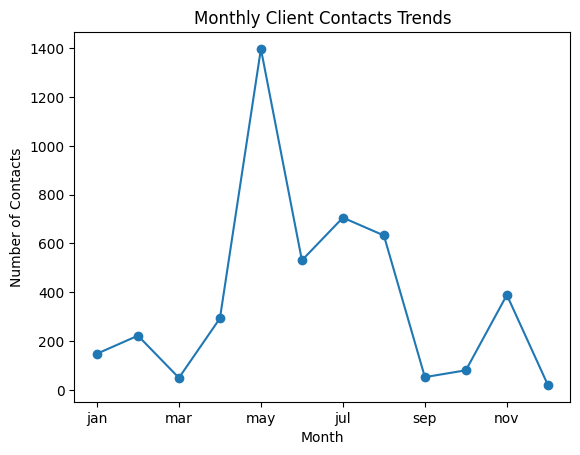

In [52]:
# monthly trends in client contacts per month

# monthly_data = df['month'].value_counts().sort_index()
# print(df["month"].unique())

monthly_contacts = df.groupby('month', observed=True).size()
monthly_contacts.plot(kind='line', marker='o')
plt.title('Monthly Client Contacts Trends')
plt.xlabel('Month')
plt.ylabel('Number of Contacts')
plt.show()


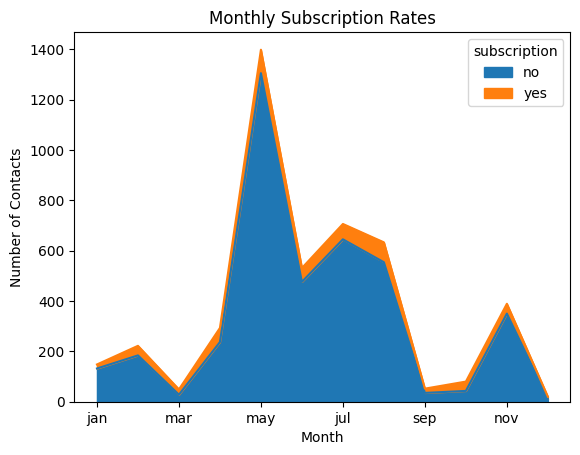

In [53]:
# Subcription rate by month
monthly_subs = df.groupby(['month', 'subscription'], observed=True).size().unstack().fillna(0)
monthly_subs.plot(kind='area', stacked=True)
plt.title('Monthly Subscription Rates')
plt.xlabel('Month')
plt.ylabel('Number of Contacts')
plt.show()


### C. Client Demographics Analysis
The analysis then focused on the subscription rates across different job categories. Job categories were ranked to identify which groups were most and least likely to subscribe.

- **Top Performers:** The Top-performers are the retirees, students, and individuals in the "unknown" category. They tend to have higher subscription rates for term deposits due to a combination of financial goals, risk aversion, targeted marketing, and their unique life circumstances that align well with the benefits of term deposits.
Both groups typically have more flexible schedules, giving them more time to engage with the bank's marketing calls or to visit the bank in person.
Retired individuals often look for stable investment opportunities with minimal risk to protect their savings and generate a steady income.

- **Mid-level Performers:** A bar plot showed that clients in certain job categories, such as management, admin and housemaids had adverage subscription rates. This could be as a result of their busy schedules and high level of daily responsibilities.

- **Bottom-level Performers:** Those in job category such as blue-collar jobs had lower rates. Young adults or recent graduates might have limited disposable income and may not prioritize saving in a term deposit, instead focusing on paying off student loans, managing living expenses, or saving for more immediate goals.

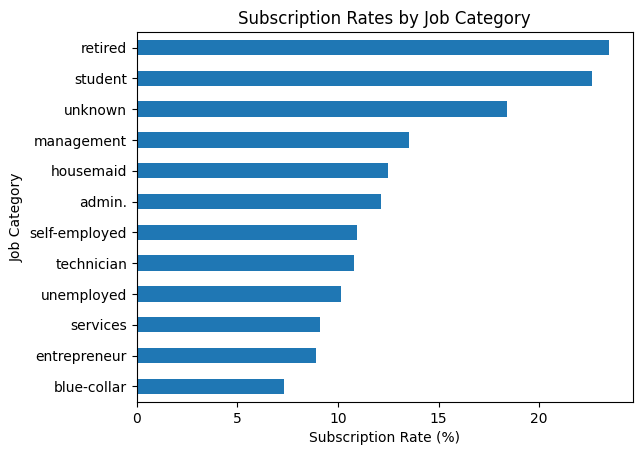

In [54]:
job_subscription = df.groupby('job')['subscription'].value_counts(normalize=True).unstack().fillna(0)['yes'] * 100
job_subscription.sort_values().plot(kind='barh')
plt.title('Subscription Rates by Job Category')
plt.xlabel('Subscription Rate (%)')
plt.ylabel('Job Category')
plt.show()


### D. Contact Duration Analysis
The scatter Plot of Contact Duration vs. Subscription was used to analyze this relationship, revealing that a moderate contact durations generally correlated with higher subscription success, particularly in certain job categories.

The scatter plot reveals that contact duration plays a significant role in influencing subscription rates, with moderate conversations generally leading to higher success rates in getting customers to subscribe to term deposits. This insight can help the bank optimize its marketing strategies to improve customer engagement and conversion rates and training of the marketing agents.

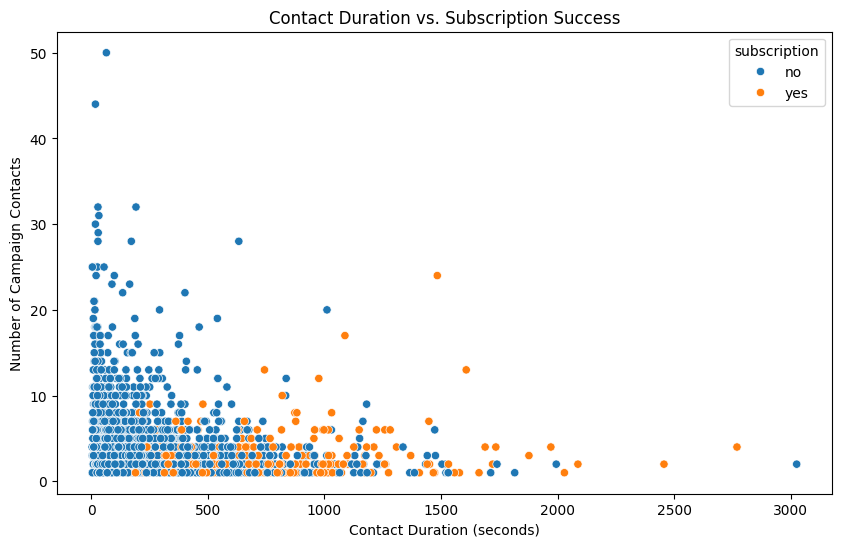

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='campaign', hue='subscription', data=df)
plt.title('Contact Duration vs. Subscription Success')
plt.xlabel('Contact Duration (seconds)')
plt.ylabel('Number of Campaign Contacts')
plt.show()


### E. Client Segment Analysis
The final part of the analysis focused on segmenting clients by age and education level:

- Subscription Rates by Age Group: Subscription rates were calculated for different age groups, revealing that clients aged 30-40 had the highest subscription rates.
- Subscription Rates by Education Level: A pie chart was created to visualize the contribution of each education level to the overall subscription rate. Clients with higher education levels showed a greater propensity to subscribe.

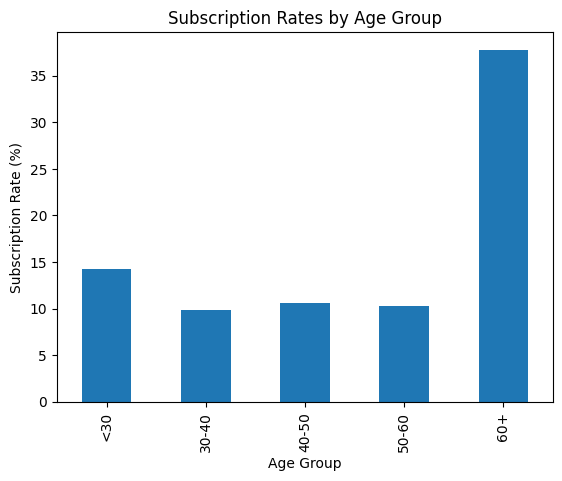

In [56]:
age_groups = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])
age_group_subscription = df.groupby(age_groups, observed=True)['subscription'].value_counts(normalize=True).unstack().fillna(0)['yes'] * 100
age_group_subscription.plot(kind='bar')
plt.title('Subscription Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate (%)')
plt.show()


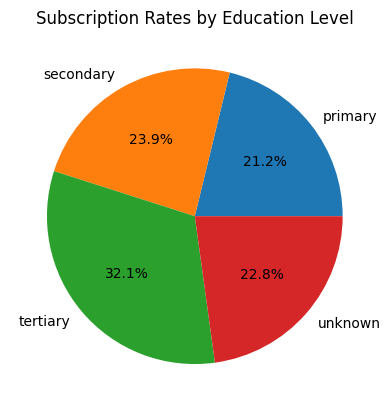

In [57]:
education_subscription = df.groupby('education')['subscription'].value_counts(normalize=True).unstack().fillna(0)['yes'] * 100
education_subscription.plot(kind='pie', autopct='%1.1f%%')
plt.title('Subscription Rates by Education Level')
plt.ylabel('')
plt.show()


# 6. Conclusion and Recommendations

### Key Findings

- Job Category Impact: Certain job categories, such as 'management', show higher subscription rates, indicating these groups may be more receptive to future marketing efforts.
- Importance of Contact Duration: There is a positive correlation between the length of client contact and the likelihood of a subscription, suggesting that investing in more extended interactions may yield better results.
- Demographic Insights: Younger clients (aged 30-40) and those with higher education levels are more likely to subscribe, offering a potential focus area for targeted campaigns.

### Recommendations
- Target High-Performing Job Categories: Future campaigns should prioritize job categories that have historically shown higher subscription rates.
- Focus on Longer Contact Durations: Training the marketing team to engage clients for longer periods could improve subscription outcomes.
- Demographic Targeting: Marketing strategies should consider age and education level as key factors in client segmentation.

# 6. Challenges and Solutions
**Challenges:**
- Data Imbalance: The dataset showed a significant imbalance between subscribed and non-subscribed clients, which could skew the analysis.
- Seasonal Variability: Monthly trends had to be carefully analyzed to account for seasonal variability in client engagement.

**Solutions**
- Use of Normalized Metrics: Subscription rates were normalized across different groups to ensure a fair comparison.
- Detailed Trend Analysis: Monthly data was carefully dissected to account for seasonal effects, ensuring that the insights derived were robust and reliable.